In [1]:
import pandas as pd
from forecasting import forecasting_model
import constants as const
from dataset import load_dataset, prepare_labelled_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

<h3> Load Datasets </h3>

In [2]:
train_df, actual_test_df = load_dataset(const.DATASET_NAME, const.DATASET_SPLIT_DATE, verbose=0)

test_adv_temp1_df = pd.read_csv("data/adversarial_dataset_temp_1.csv")
test_adv_temp1_df = test_adv_temp1_df.set_index('Datetime')
test_adv_temp1_df.index = pd.to_datetime(test_adv_temp1_df.index)
print(f'Test_adversarial_temp1 dataset shape: {test_adv_temp1_df.shape}')

test_adv_temp2_df = pd.read_csv("data/adversarial_dataset_temp_2.csv")
test_adv_temp2_df = test_adv_temp2_df.set_index('Datetime')
test_adv_temp2_df.index = pd.to_datetime(test_adv_temp2_df.index)
print(f'Test_adversarial_temp2 dataset shape: {test_adv_temp2_df.shape}')

test_adv_temp3_df = pd.read_csv("data/adversarial_dataset_temp_3.csv")
test_adv_temp3_df = test_adv_temp3_df.set_index('Datetime')
test_adv_temp3_df.index = pd.to_datetime(test_adv_temp3_df.index)
print(f'Test_adversarial_temp3 dataset shape: {test_adv_temp3_df.shape}')

test_adv_temp4_df = pd.read_csv("data/adversarial_dataset_temp_4.csv")
test_adv_temp4_df = test_adv_temp4_df.set_index('Datetime')
test_adv_temp4_df.index = pd.to_datetime(test_adv_temp4_df.index)
print(f'Test_adversarial_temp4 dataset shape: {test_adv_temp4_df.shape}')

test_adv_temp5_df = pd.read_csv("data/adversarial_dataset_temp_5.csv")
test_adv_temp5_df = test_adv_temp5_df.set_index('Datetime')
test_adv_temp5_df.index = pd.to_datetime(test_adv_temp5_df.index)
print(f'Test_adversarial_temp5 dataset shape: {test_adv_temp5_df.shape}')

Dataset shape: (20759, 77)
Training dataset shape: (20520, 77)
Test dataset shape: (239, 77)
Test_adversarial_temp1 dataset shape: (239, 77)
Test_adversarial_temp2 dataset shape: (239, 77)
Test_adversarial_temp3 dataset shape: (239, 77)
Test_adversarial_temp4 dataset shape: (239, 77)
Test_adversarial_temp5 dataset shape: (239, 77)


<h3> Plot Temperature Profile </h3>

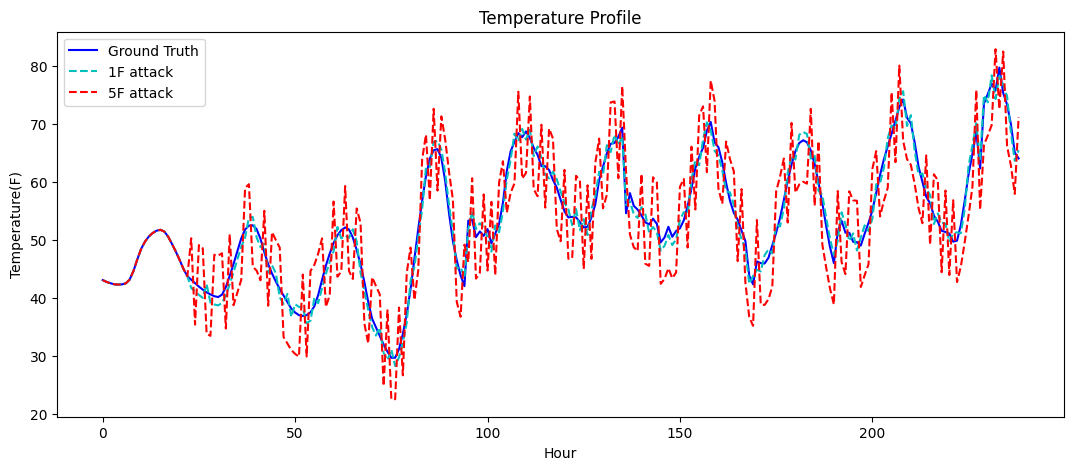

In [3]:
plt.figure(figsize=(13,5))
plt.plot(list(actual_test_df['zrh_t']), label='Ground Truth', color='b')
plt.plot(list(test_adv_temp1_df['zrh_t']), label='1F attack', color='c', linestyle='dashed')
plt.plot(list(test_adv_temp5_df['zrh_t']), label='5F attack', color='r', linestyle='dashed')
plt.title('Temperature Profile')
plt.ylabel("Temperature(F)")
plt.xlabel("Hour")
plt.legend()
plt.savefig('output/temperature_profile.png')

<h3> Load Forecasting Profile </h3>

<h4> Load Trained Model </h4>

In [4]:
model = forecasting_model(const.SEQ_LENGTH, const.FEATURE_DIM, const.FORECAST_HORIZON)
model.summary()
model.load_weights(const.MODEL_NAME)

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                36352     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 37,409
Trainable params: 37,409
Non-trainable params: 0
_________________________________________________________________


<h4> Data Preprocessing </h4>

In [5]:
non_categorical_features = ['bsl_t', 'brn_t', 'zrh_t', 'lug_t', 'lau_t', 'gen_t', 'stg_t', 'luz_t']
features_scaler = StandardScaler()
features_scaler.fit(train_df[non_categorical_features])
load_scaler = StandardScaler()
load_scaler.fit(train_df[['actual_load']])

StandardScaler()

In [6]:
actual_test_df[non_categorical_features] = features_scaler.transform(actual_test_df[non_categorical_features])
actual_test_df['actual_load'] = load_scaler.transform(actual_test_df[['actual_load']])

test_adv_temp1_df[non_categorical_features] = features_scaler.transform(test_adv_temp1_df[non_categorical_features])
test_adv_temp1_df['actual_load'] = load_scaler.transform(test_adv_temp1_df[['actual_load']])

test_adv_temp2_df[non_categorical_features] = features_scaler.transform(test_adv_temp2_df[non_categorical_features])
test_adv_temp2_df['actual_load'] = load_scaler.transform(test_adv_temp2_df[['actual_load']])

test_adv_temp3_df[non_categorical_features] = features_scaler.transform(test_adv_temp3_df[non_categorical_features])
test_adv_temp3_df['actual_load'] = load_scaler.transform(test_adv_temp3_df[['actual_load']])

test_adv_temp4_df[non_categorical_features] = features_scaler.transform(test_adv_temp4_df[non_categorical_features])
test_adv_temp4_df['actual_load'] = load_scaler.transform(test_adv_temp4_df[['actual_load']])

test_adv_temp5_df[non_categorical_features] = features_scaler.transform(test_adv_temp5_df[non_categorical_features])
test_adv_temp5_df['actual_load'] = load_scaler.transform(test_adv_temp5_df[['actual_load']])


In [7]:
X_test, y_test = prepare_labelled_dataset(actual_test_df)
print(f'X_test dataset shape: {X_test.shape}')
print(f'y_test dataset shape: {y_test.shape}')

X_test_adv_temp1, y_test_adv_temp1 = prepare_labelled_dataset(test_adv_temp1_df)
print(f'X_test_adv_temp1 dataset shape: {X_test_adv_temp1.shape}')
print(f'y_test_adv_temp1 dataset shape: {y_test_adv_temp1.shape}')

X_test_adv_temp2, y_test_adv_temp2 = prepare_labelled_dataset(test_adv_temp2_df)
print(f'X_test_adv_temp2 dataset shape: {X_test_adv_temp2.shape}')
print(f'y_test_adv_temp2 dataset shape: {y_test_adv_temp2.shape}')

X_test_adv_temp3, y_test_adv_temp3 = prepare_labelled_dataset(test_adv_temp3_df)
print(f'X_test_adv_temp3 dataset shape: {X_test_adv_temp3.shape}')
print(f'y_test_adv_temp3 dataset shape: {y_test_adv_temp3.shape}')

X_test_adv_temp4, y_test_adv_temp4 = prepare_labelled_dataset(test_adv_temp4_df)
print(f'X_test_adv_temp4 dataset shape: {X_test_adv_temp4.shape}')
print(f'y_test_adv_temp4 dataset shape: {y_test_adv_temp4.shape}')

X_test_adv_temp5, y_test_adv_temp5 = prepare_labelled_dataset(test_adv_temp5_df)
print(f'X_test_adv_temp5 dataset shape: {X_test_adv_temp5.shape}')
print(f'y_test_adv_temp5 dataset shape: {y_test_adv_temp5.shape}')


X_test dataset shape: (214, 24, 77)
y_test dataset shape: (214, 1)
X_test_adv_temp1 dataset shape: (214, 24, 77)
y_test_adv_temp1 dataset shape: (214, 1)
X_test_adv_temp2 dataset shape: (214, 24, 77)
y_test_adv_temp2 dataset shape: (214, 1)
X_test_adv_temp3 dataset shape: (214, 24, 77)
y_test_adv_temp3 dataset shape: (214, 1)
X_test_adv_temp4 dataset shape: (214, 24, 77)
y_test_adv_temp4 dataset shape: (214, 1)
X_test_adv_temp5 dataset shape: (214, 24, 77)
y_test_adv_temp5 dataset shape: (214, 1)


<h4> Prediction </h4>

In [8]:
y_actual_df = pd.DataFrame(y_test, columns=[['load']])
y_actual = load_scaler.inverse_transform(y_actual_df)


y_pred = model.predict(X_test, verbose=0)
y_pred_df = pd.DataFrame(y_pred, columns=[['load']])
y_pred = load_scaler.inverse_transform(y_pred_df)


y_pred_adv_temp1 = model.predict(X_test_adv_temp1, verbose=0)
y_pred_adv_temp1_df = pd.DataFrame(y_pred_adv_temp1, columns=[['load']])
y_pred_adv_temp1 = load_scaler.inverse_transform(y_pred_adv_temp1_df)

y_pred_adv_temp2 = model.predict(X_test_adv_temp2, verbose=0)
y_pred_adv_temp2_df = pd.DataFrame(y_pred_adv_temp2, columns=[['load']])
y_pred_adv_temp2 = load_scaler.inverse_transform(y_pred_adv_temp2_df)

y_pred_adv_temp3 = model.predict(X_test_adv_temp3, verbose=0)
y_pred_adv_temp3_df = pd.DataFrame(y_pred_adv_temp3, columns=[['load']])
y_pred_adv_temp3 = load_scaler.inverse_transform(y_pred_adv_temp3_df)

y_pred_adv_temp4 = model.predict(X_test_adv_temp4, verbose=0)
y_pred_adv_temp4_df = pd.DataFrame(y_pred_adv_temp4, columns=[['load']])
y_pred_adv_temp4 = load_scaler.inverse_transform(y_pred_adv_temp4_df)

y_pred_adv_temp5 = model.predict(X_test_adv_temp5, verbose=0)
y_pred_adv_temp5_df = pd.DataFrame(y_pred_adv_temp5, columns=[['load']])
y_pred_adv_temp5 = load_scaler.inverse_transform(y_pred_adv_temp5_df)


2023-11-20 15:02:05.673659: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


<h4> Plot Load Forecasting Profile </h4>

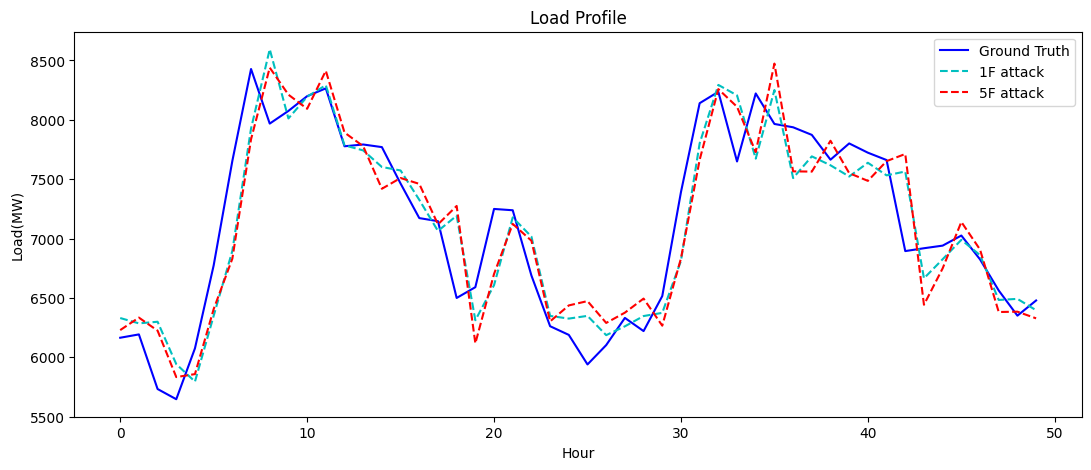

In [9]:
plt.figure(figsize=(13,5))
plt.plot(y_actual[:50], label='Ground Truth', color='b')
plt.plot(y_pred_adv_temp1[:50], label='1F attack', color='c', linestyle='dashed')
plt.plot(y_pred_adv_temp5[:50], label='5F attack', color='r', linestyle='dashed')
plt.title('Load Profile')
plt.ylabel("Load(MW)")
plt.xlabel("Hour")
plt.legend()
plt.savefig('output/load_forecasting_profile.png')

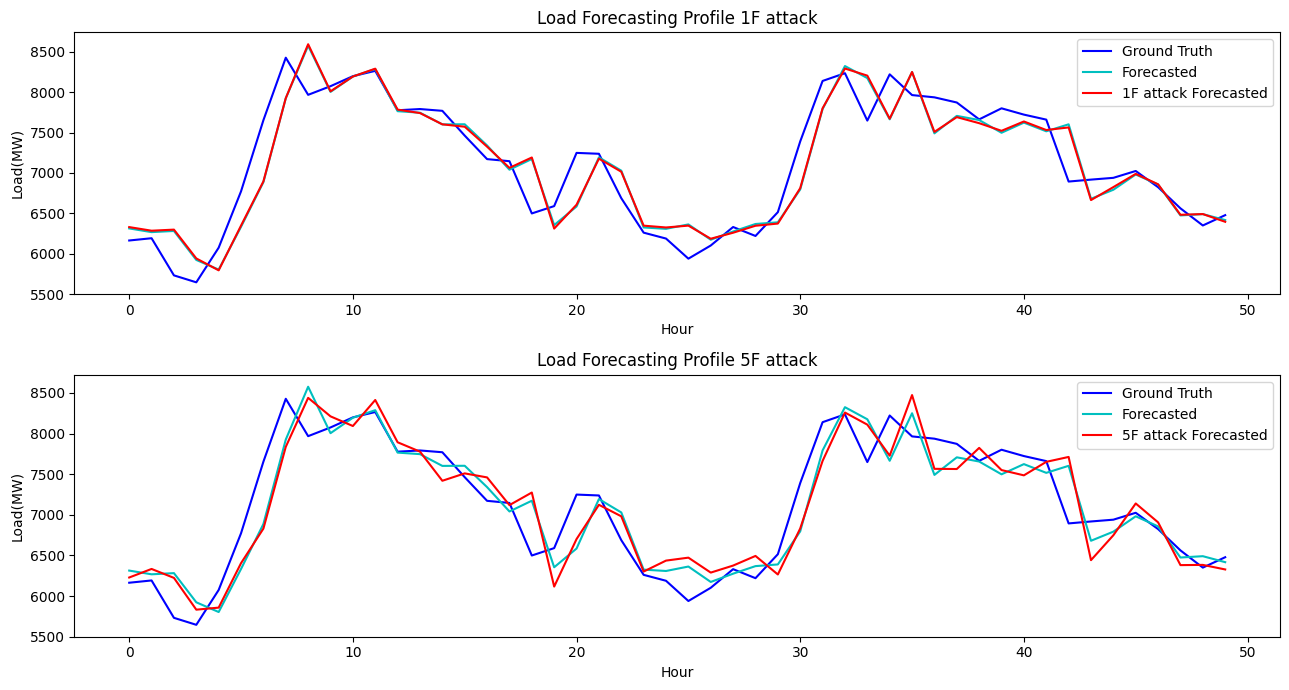

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(13,7))

axes[0].plot(y_actual[:50], color='b')
axes[0].plot(y_pred[:50], color='c')
axes[0].plot(y_pred_adv_temp1[:50], color='r')
axes[0].set_title("Load Forecasting Profile 1F attack")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Load(MW)")
axes[0].legend(['Ground Truth', 'Forecasted', '1F attack Forecasted'])

axes[1].plot(y_actual[:50], color='b')
axes[1].plot(y_pred[:50], color='c')
axes[1].plot(y_pred_adv_temp5[:50], color='r')
axes[1].set_title("Load Forecasting Profile 5F attack")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Load(MW)")
axes[1].legend(['Ground Truth', 'Forecasted', '5F attack Forecasted'])

plt.tight_layout()
plt.savefig('output/load_forecasting_profile_1F_5F.png')

<h4> Plot Forecasting MAPE with Temperature Variation </h4> 

3.8852858232487764
4.221776004733733


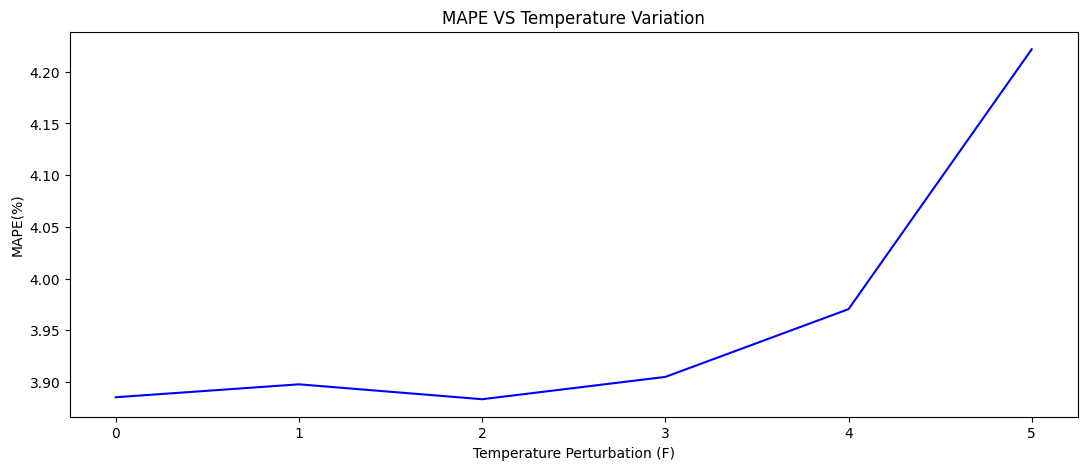

In [11]:
mape_0 = mean_absolute_percentage_error(y_actual, y_pred)*100
mape_temp1 = mean_absolute_percentage_error(y_actual, y_pred_adv_temp1)*100
mape_temp2 = mean_absolute_percentage_error(y_actual, y_pred_adv_temp2)*100
mape_temp3 = mean_absolute_percentage_error(y_actual, y_pred_adv_temp3)*100
mape_temp4 = mean_absolute_percentage_error(y_actual, y_pred_adv_temp4)*100
mape_temp5 = mean_absolute_percentage_error(y_actual, y_pred_adv_temp5)*100

print(mape_0)
print(mape_temp5)

mape = [mape_0, mape_temp1, mape_temp2, mape_temp3, mape_temp4, mape_temp5]

plt.figure(figsize=(13,5))
plt.plot(mape, color='b')
plt.title('MAPE VS Temperature Variation')
plt.ylabel("MAPE(%)")
plt.xlabel("Temperature Perturbation (F)")
plt.savefig('output/mape_temperature_variation.png')